In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

In [3]:
path = '~/Documents/dmproject/datasets/'

In [4]:
df = pd.read_csv(path + 'new_features.csv')

In [5]:
# Drop the id column, it' s not necessary to the classification task
df.drop(df.columns[0], axis=1, inplace=True)
df.drop(df.columns[6], axis=1, inplace=True)

In [6]:
df

,TotalItems,DistinctItems,MaxItems,Entropy,TotalSale,Frequency,customer_type
0,1135,82,316,6.114311,342.22,131,high-spending
1,436,50,436,5.643856,117.96,50,high-spending
2,172,15,172,3.906891,24.45,15,medium-spending
3,413,45,119,5.286226,180.70,66,high-spending
4,14,2,14,1.000000,4.40,2,low-spending
...,...,...,...,...,...,...,...
4147,37,7,37,2.807355,23.85,7,low-spending
4148,52,5,52,2.321928,5.46,5,low-spending
4149,44,8,26,3.000000,17.39,8,low-spending
4150,1351,257,241,7.468946,1119.53,715,high-spending


In [7]:
# label 0: high-spending
# label 1: medium-spending
# label 2: low-spending
df['customer_type'] = df['customer_type'].replace('high-spending', 0)
df['customer_type'] = df['customer_type'].replace('medium-spending', 1)
df['customer_type'] = df['customer_type'].replace('low-spending', 2)

In [8]:
y = df['customer_type']
X = df.drop(columns=['customer_type'])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
# Set the parameters by cross-validation
tuned_parameters = {
    'n_neighbors': list(range(1, 31, 3)),
    'weights': ['uniform', 'distance'],
}

#scores = ['precision', 'recall', 'f1']
scores = ['f1_macro']

for score in scores:
    print("# Tuning hyper-parameters for ----> %s" % score)
    print()
    
    obj = KNeighborsClassifier()   
    
    if (score == "f1_macro"):
      clf = GridSearchCV(obj, tuned_parameters, cv=5, scoring=score)
    else:
      clf = GridSearchCV(obj, tuned_parameters, cv=5, scoring='%s_macro' % score)

    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for ----> f1_macro

Best parameters set found on development set:

{'n_neighbors': 13, 'weights': 'distance'}

Grid scores on development set:

0.973 (+/-0.010) for {'n_neighbors': 1, 'weights': 'uniform'}
0.973 (+/-0.010) for {'n_neighbors': 1, 'weights': 'distance'}
0.975 (+/-0.006) for {'n_neighbors': 4, 'weights': 'uniform'}
0.977 (+/-0.005) for {'n_neighbors': 4, 'weights': 'distance'}
0.972 (+/-0.010) for {'n_neighbors': 7, 'weights': 'uniform'}
0.975 (+/-0.009) for {'n_neighbors': 7, 'weights': 'distance'}
0.975 (+/-0.008) for {'n_neighbors': 10, 'weights': 'uniform'}
0.977 (+/-0.004) for {'n_neighbors': 10, 'weights': 'distance'}
0.976 (+/-0.010) for {'n_neighbors': 13, 'weights': 'uniform'}
0.979 (+/-0.004) for {'n_neighbors': 13, 'weights': 'distance'}
0.975 (+/-0.005) for {'n_neighbors': 16, 'weights': 'uniform'}
0.977 (+/-0.007) for {'n_neighbors': 16, 'weights': 'distance'}
0.972 (+/-0.006) for {'n_neighbors': 19, 'weights': 'uniform'}
0.976 (+/-0

In [11]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

## Try my Neural Network

In [12]:
from wavegrad.utility import *
from wavegrad.network import Sequential
from wavegrad.layers import LayerDense
from wavegrad.activations import *
from wavegrad.losses import MAE, MSE
from wavegrad.optimizers import *
from wavegrad.regularizer import L2
from keras.utils import np_utils

In [13]:
X_train = X_train.values
X_test = X_test.values

In [14]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [15]:
X_train.shape

(3321, 6)

In [16]:
y_test

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

In [53]:
# # Network
net = Sequential()
net.add(LayerDense(6, 10, sigmoid))
net.add(LayerDense(10, 3, sigmoid))

reg = L2(l2=0.001)
optim = GD(net.layers, lr=0.001, momentum=0.6)
net.use(MSE)
net.fit(X_train, y_train, epochs=200, optimizer=optim, validation_split=0.2, regularizer=reg)

epoch 200/200   error=0.13    accuracy=0.81    val_error=0.15    val_acc=0.79: 100%|██████████| 200/200 [00:56<00:00,  3.54it/s]


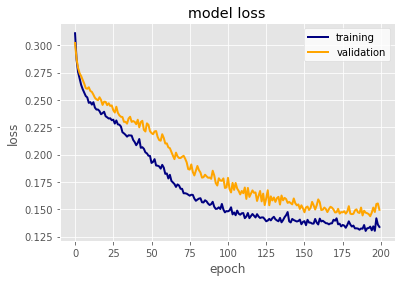

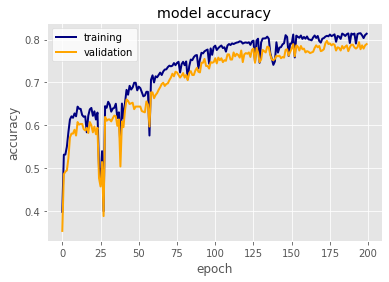

In [54]:
plot_loss(net)
plot_accuracy(net)

In [56]:
# Test accuracy on test set.
out = net.predict(X_test)
accuracy(y_test, out)

0.7942238267148014